Name : Yassine MKAOUAR

E-mail : yassine.mkaouar@polytechnique.edu

# MAP654I: Practical Introduction to Machine Learning  
## Practical Session 3: Classification

### Importing libraries

In [88]:
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Pima Dataset

### 1.3 Loading the data

In [62]:
# Load the data
data = np.load("pima.npz")

x1 = data['xall']
y1 = data['yall']
varnames = data['varnames']

print("x1 shape:", x1.shape)
print("y1 shape:", y1.shape)
print("Variable names:", varnames)

x1 shape: (709, 8)
y1 shape: (709,)
Variable names: ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


Predictor variables included are:
- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)

In [63]:
# Create a DataFrame for better visualization 
df = pd.DataFrame(x1, columns=varnames)
df['Diabetes'] = y1
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,7.0,159.0,64.0,0.0,0.0,27.4,0.294,40.0,-1
1,0.0,180.0,66.0,39.0,0.0,42.0,1.893,25.0,1
2,1.0,146.0,56.0,0.0,0.0,29.7,0.564,29.0,-1
3,2.0,71.0,70.0,27.0,0.0,28.0,0.586,22.0,-1
4,7.0,103.0,66.0,32.0,0.0,39.1,0.344,31.0,1


In [64]:
# Calculate mean values for each variable
print("Mean values for each variable:")
print(df.mean().to_frame(name='Mean').T)  

Mean values for each variable:
      Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
Mean     3.747532  121.607898      69.643159      20.765867  80.531735   

            BMI  DiabetesPedigreeFunction        Age  Diabetes  
Mean  32.453032                  0.470961  33.021157 -0.317348  


### 2.1 Know the data


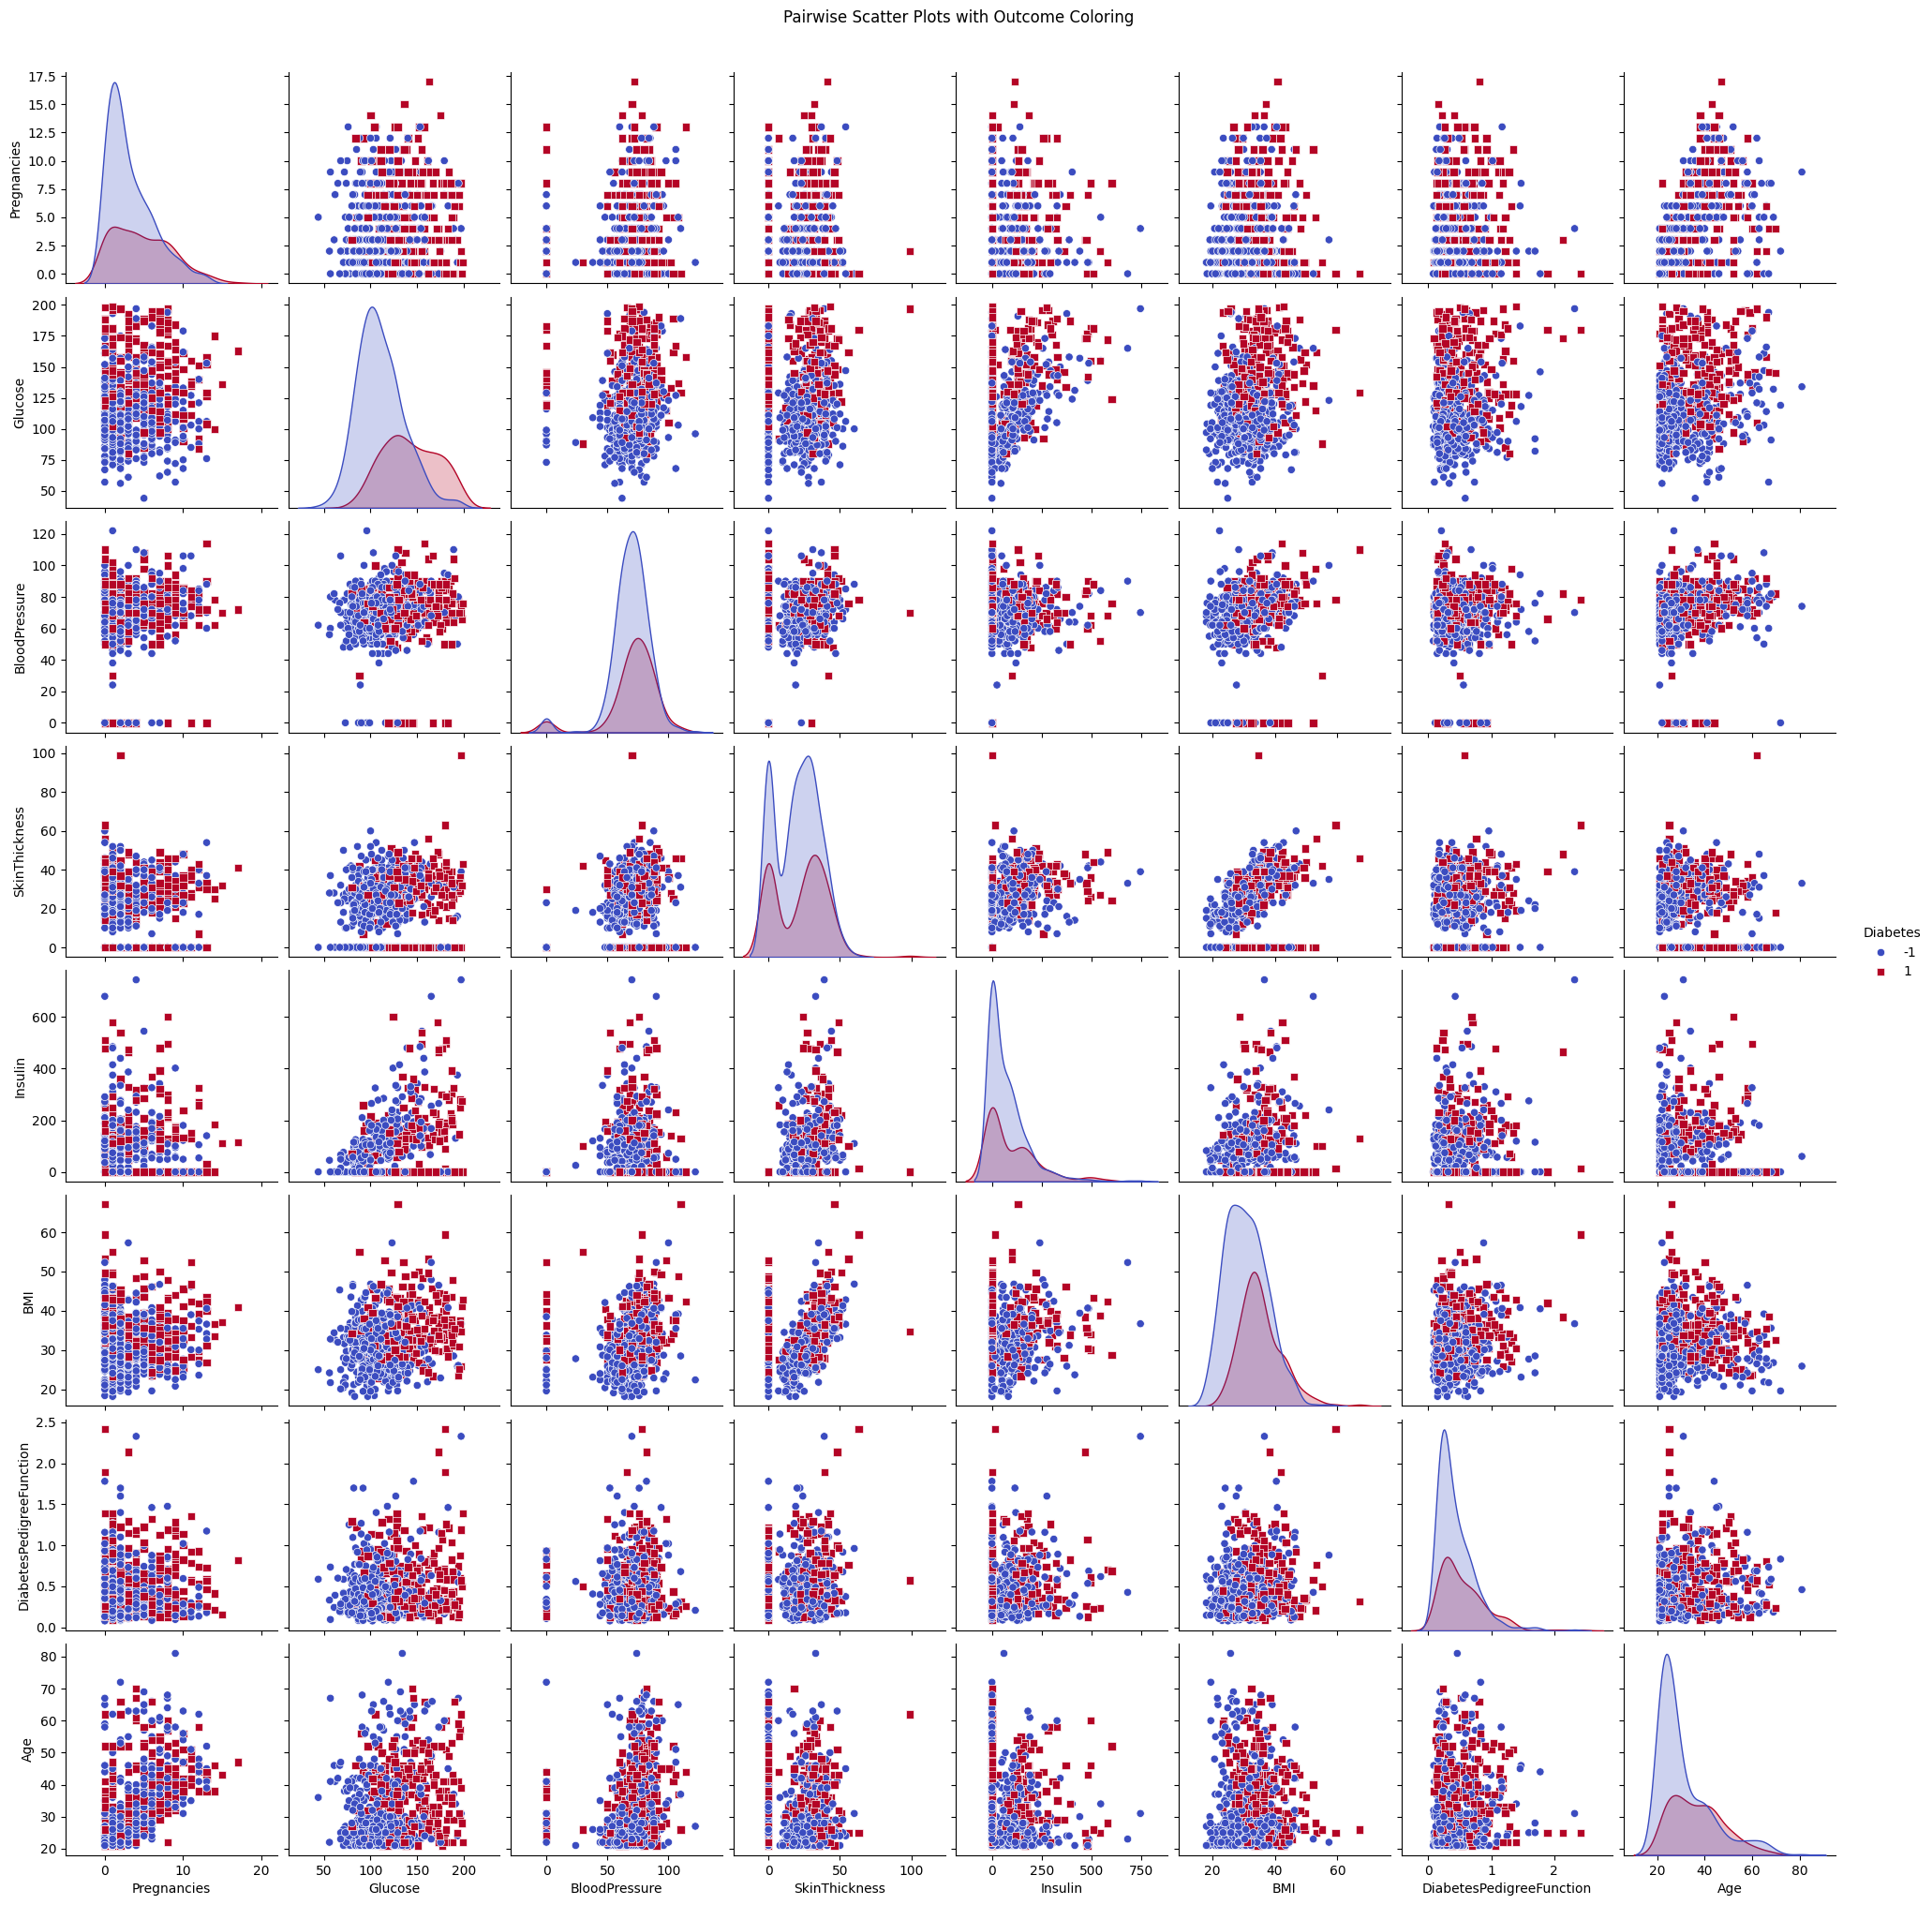

In [65]:
# Visualize pairwise scatter plots with color by Diabetes 
sns.pairplot(df, hue="Diabetes", palette="coolwarm", diag_kind="kde", markers=["o", "s"], vars=varnames)
plt.suptitle("Pairwise Scatter Plots with Outcome Coloring", y=1.02)  
plt.show()

Among the features in the Pima dataset, several pairs of variables seem to offer predictive power for the diabetes outcome. Notably, the pair **glucose** and **blood pressure** provides valuable insights for predicting diabetes status. Other pairs that appear relevant include **glucose and skin thickness**, **glucose and BMI (body mass index)**, **glucose and age**, as well as **glucose and diabetes pedigree function**. Additionally, while less pronounced, the combination of **glucose** and **insulin** still exhibits some predictive capability.

From a medical perspective, these variable pairs make sense as potential indicators of diabetes. Elevated glucose levels are a direct sign of impaired glucose metabolism, a hallmark of diabetes. High blood pressure is also common in diabetic patients due to the vascular complications that diabetes can cause over time. BMI is relevant because higher body weight is a known risk factor for Type 2 diabetes, and higher skin fold thickness may similarly correlate with body fat levels. The diabetes pedigree function, which estimates the likelihood of diabetes based on family history, naturally aligns with genetic predispositions to diabetes. Age is a relevant factor since the risk of developing Type 2 diabetes increases with age. Lastly, insulin levels are directly related to glucose metabolism, as they are key to glucose regulation; however, their predictive power is slightly lower in this dataset, potentially due to variability in insulin resistance and insulin secretion among individuals.

Overall, these variable pairs not only show statistical association but also align with established medical knowledge, reinforcing their relevance for diabetes prediction.

In [66]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, train_size=300, random_state=42, stratify=y1)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (300, 8) (300,)
Test set shape: (409, 8) (409,)


In [67]:
# Calculate variance for each feature
variances = df.var()
print("Variance of each feature:")
print(variances)

Variance of each feature:
Pregnancies                    11.152271
Glucose                       929.676548
BloodPressure                 328.899321
SkinThickness                 252.795387
Insulin                     12696.421661
BMI                            48.312692
DiabetesPedigreeFunction        0.105791
Age                           136.167631
Diabetes                        0.900560
dtype: float64


The features in the dataset show considerable differences in variance, ranging from 0.1 (Diabetes Pedigree Function) to 12,696.4 (Insulin). Such disparity can negatively impact classification models, especially those sensitive to feature scaling, like logistic regression or k-nearest neighbors. Higher-variance features (e.g., Insulin) could dominate the model’s learning process, while lower-variance features may have reduced influence. To mitigate this, we apply **standardization**, which scales each feature to have a mean of 0 and a variance of 1. This step ensures that all features contribute equally to the classification task, improving model stability and performance.

In [68]:
# Apply a standardization to the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2.2 Bayesian decision and linear classification

#### LDA Classifier

Linear Discriminant Analysis (LDA) is a supervised machine learning algorithm used for classification. It works by finding the linear combinations of features that best separate two or more classes (2 in our case). LDA maximizes the ratio of between-class variance to within-class variance, aiming to achieve the best separation between classes while reducing dimensionality.

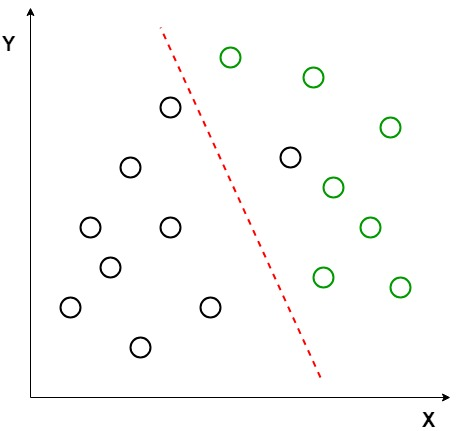

In [69]:
# Train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

y_pred = lda.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Compute the probabilities of the class 1
y_proba = lda.predict_proba(X_test_scaled)[:, 1]

# AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

Accuracy: 0.7946
AUC: 0.8435


The Linear Discriminant Analysis (LDA) classifier achieved an accuracy of **79.46%** and an AUC of **0.8435** on the test set. This indicates that the model correctly classified around 79.5% of test samples. The AUC of 0.8435 suggests good discriminatory ability, as the model effectively distinguishes between diabetic and non-diabetic cases. An AUC close to 1 indicates a high true positive rate and low false positive rate, demonstrating that LDA performs well in predicting diabetes based on the given features.

In [70]:
# Parameter grid
param_grid = {
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
}

lda = LinearDiscriminantAnalysis(solver='lsqr') # We used 'lsqr' solver for shrinkage

grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print("Best parameter found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

Best parameter found:  {'shrinkage': 0.1}
Best cross-validation accuracy: 0.7900


After performing grid search cross-validation for the shrinkage parameter in Linear Discriminant Analysis (LDA), the best parameter found was **shrinkage = 0.1**, with a **best cross-validation accuracy of 79%**. Despite tuning this parameter, the cross-validation did not lead to better performance compared to the default model. This suggests that the regularization provided by shrinkage does not significantly improve the model's ability to classify the data.

####  Quadratic Discriminant Analysis (QDA) classifier

Quadratic Discriminant Analysis (QDA) is a supervised machine learning algorithm used for classification. Unlike Linear Discriminant Analysis (LDA), which assumes equal covariance matrices for all classes, QDA assumes that each class has its own covariance matrix. This allows QDA to model more complex decision boundaries between classes by fitting a quadratic decision function. QDA is effective when the data shows significant differences in variances across classes, but it can be more prone to overfitting when the sample size is small.

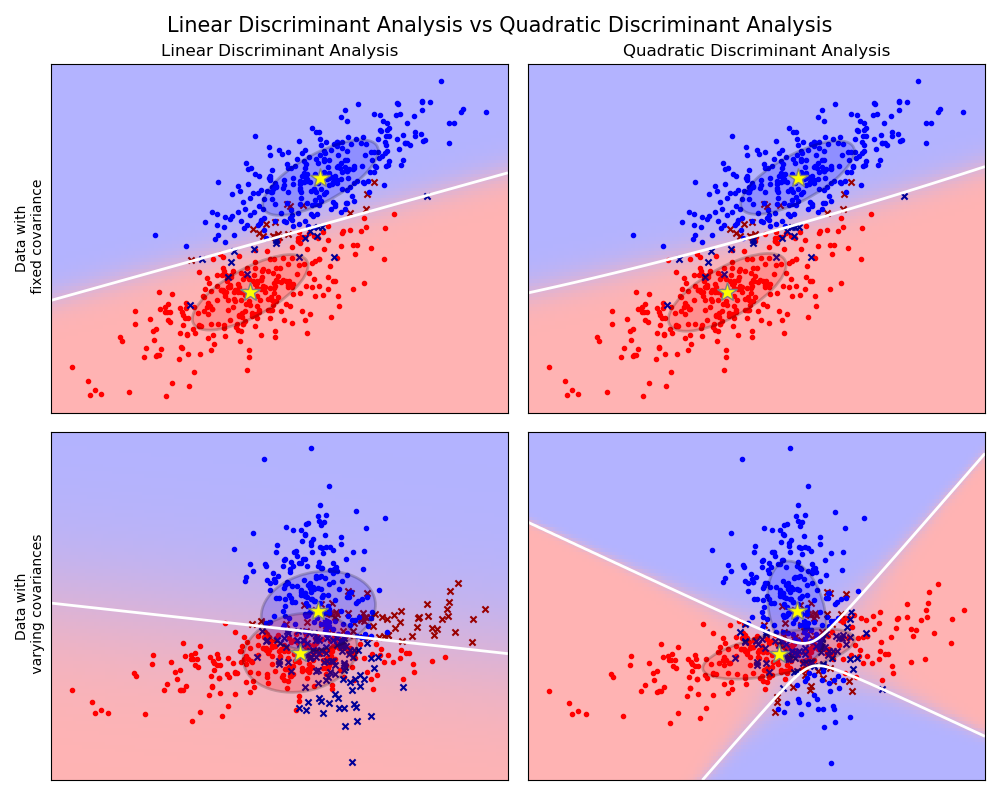

In [71]:
# Train QDA classifier
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

y_pred_qda = qda.predict(X_test_scaled)

# Compute accuracy
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f"QDA Accuracy: {accuracy_qda:.4f}")

y_proba_qda = qda.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc_qda = roc_auc_score(y_test, y_proba_qda)
print(f"QDA AUC: {auc_qda:.4f}")

QDA Accuracy: 0.7408
QDA AUC: 0.8109


The Quadratic Discriminant Analysis (QDA) classifier achieved an accuracy of **74.08%** and an AUC of **0.8109** on the test set. While QDA performed slightly worse than LDA in terms of accuracy and AUC. 

LDA has the advantage of being simpler (with fewer parameters), QDA does not provide a significant improvement for this dataset. The similar results suggest that the data might not have enough complexity to benefit from the more flexible quadratic decision boundaries of QDA.

In [72]:
# Define the parameter grid
param_grid_qda = {
    'reg_param': [0.0, 0.1, 0.5, 0.9, 1.0]
}

qda = QuadraticDiscriminantAnalysis()

# Initialize GridSearchCV 
grid_search_qda = GridSearchCV(qda, param_grid_qda, cv=5, scoring='accuracy')

grid_search_qda.fit(X_train_scaled, y_train)

print("Best parameter found: ", grid_search_qda.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_qda.best_score_))

Best parameter found:  {'reg_param': 0.5}
Best cross-validation accuracy: 0.7667


After performing cross-validation with GridSearchCV for the **reg_param** parameter, the best parameter found was **reg_param = 0.5**, yielding a **best cross-validation accuracy of 76.67%**. Despite the tuning, the performance of QDA remains lower than that of LDA, which achieved higher accuracy and AUC. The relatively poor performance of QDA, even after regularization, suggests that its more complex decision boundary is not providing a substantial benefit over LDA for this dataset. This further emphasizes that the simpler linear decision boundary in LDA may be more appropriate for the given features and data distribution.

#### Gaussian Naive Bayes (NB) classifier

Gaussian Naive Bayes (NB) is a probabilistic classifier based on Bayes' Theorem, assuming that the features are conditionally independent given the class. It applies a Gaussian (normal) distribution to model the continuous features for each class. The classifier estimates the parameters (mean and variance) of the Gaussian distribution for each feature, and uses these to compute the likelihood of each class. It is simple, fast, and effective, especially when the features are approximately normally distributed.

In [73]:
# Train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

y_pred_gnb = gnb.predict(X_test_scaled)

# Compute accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb:.4f}")

# Compute the probabilities of the class 1
y_proba_gnb = gnb.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc_gnb = roc_auc_score(y_test, y_proba_gnb)
print(f"Gaussian Naive Bayes AUC: {auc_gnb:.4f}")

Gaussian Naive Bayes Accuracy: 0.7702
Gaussian Naive Bayes AUC: 0.8339


The **Gaussian Naive Bayes (NB)** classifier achieved an accuracy of **77.02%** and an AUC of **0.8339** on the test set. Compared to the **Quadratic Discriminant Analysis (QDA)**, which had an accuracy of **76.67%** and AUC of **0.8109**, NB performs slightly better in both accuracy and AUC. However, LDA outperforms both NB and QDA, with an accuracy of **79.46%** and an AUC of **0.8435**. 

Thus, LDA remains the best-performing model for this task, followed by Gaussian Naive Bayes, while QDA performs the least well. The better performance of NB compared to QDA suggests that the feature independence assumption in Naive Bayes is more suited to the dataset than the more complex quadratic boundaries of QDA.

#### Logistic regression classifier

In [74]:
# Train Logistic Regression classifier
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)

# Compute accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

# Compute the probabilities of the class 1
y_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc_log_reg = roc_auc_score(y_test, y_proba_log_reg)
print(f"Logistic Regression AUC: {auc_log_reg:.4f}")

Logistic Regression Accuracy: 0.7848
Logistic Regression AUC: 0.8426


When comparing this to the other classifiers:

- **Logistic Regression** : Accuracy **78.48%**, AUC **0.8426**
- **Linear Discriminant Analysis (LDA)**: Accuracy **79.46%**, AUC **0.8435**
- **Quadratic Discriminant Analysis (QDA)**: Accuracy **76,67%**, AUC **0.8109**
- **Gaussian Naive Bayes (NB)**: Accuracy **77.02%**, AUC **0.8339**

**LDA** remains the best performing classifier in terms of accuracy and AUC, although **Logistic Regression** is close behind in both metrics.
**NB** performs slightly worse than **Logistic Regression**, but it still outperforms **QDA**, which has the lowest accuracy and AUC.

- **Logistic Regression** is competitive with **LDA** in this case, providing a strong balance between simplicity and performance. While LDA slightly edges out Logistic Regression in accuracy, both models show very similar discriminative power as indicated by their AUC scores.

In [75]:
# Define the parameter grid for C
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

grid_search_log_reg = GridSearchCV(log_reg_l1, param_grid_log_reg, cv=5, scoring='accuracy')

# Fit the model
grid_search_log_reg.fit(X_train_scaled, y_train)

print("Best parameter found: ", grid_search_log_reg.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_log_reg.best_score_))

Best parameter found:  {'C': 1}
Best cross-validation accuracy: 0.7833


In [ ]:
# Best logistic regression model from grid search
best_log_reg = grid_search_log_reg.best_estimator_

coefficients = best_log_reg.coef_.flatten()

# Find which features have zero coefficients
removed_features = [varnames[i] for i in range(len(coefficients)) if coefficients[i] == 0]
print("Removed features:", removed_features)

Removed features: [np.str_('SkinThickness')]


The model is sparse because of the use of L1 regularization (Lasso). L1 regularization encourages sparsity by penalizing the absolute values of the coefficients, driving some of them to zero. In this case, the feature SkinThickness has a coefficient of zero, meaning it was removed from the model. Hence, the model has effectively excluded this feature, and this contributes to the sparsity of the model. The classifier is performing reasonably well, with a test accuracy around 78% and an AUC of 0.84, indicating solid performance in classifying the diabetes outcome.

- The Linear Discriminant Analysis (LDA) model seems to perform the best, followed by Logistic Regression (LR). These models assume a linear decision boundary between the classes, which works well when the data follows linear separability or can be approximated by linear functions.

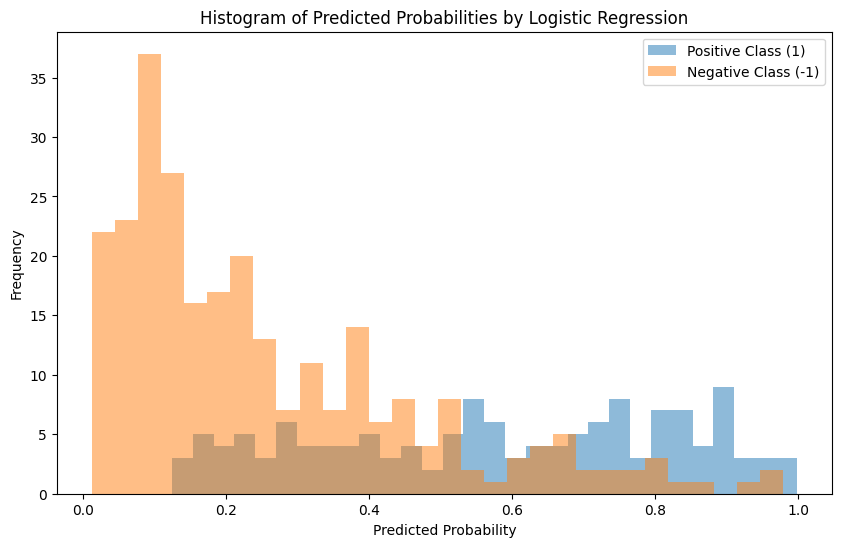

In [ ]:
# Get the predicted probabilities for the positive class
y_proba_log_reg = best_log_reg.predict_proba(X_test_scaled)[:, 1]

plt.figure(figsize=(10, 6))
plt.hist(y_proba_log_reg[y_test == 1], bins=30, alpha=0.5, label='Positive Class (1)')
plt.hist(y_proba_log_reg[y_test == -1], bins=30, alpha=0.5, label='Negative Class (-1)')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities by Logistic Regression')
plt.legend(loc='upper right')
plt.show()

The model appears to be quite confident in predicting the negative class, as evidenced by the high frequency of predictions in the lower probability range. The positive class predictions are more spread out, suggesting that the model has a harder time distinguishing these samples with high confidence.

In [83]:
coef_df = pd.DataFrame({
    'Feature': varnames,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df[['Feature', 'Coefficient']])

                    Feature  Coefficient
1                   Glucose     1.096378
5                       BMI     0.742135
6  DiabetesPedigreeFunction     0.370014
7                       Age     0.341877
4                   Insulin    -0.265226
2             BloodPressure    -0.181431
0               Pregnancies     0.093955
3             SkinThickness     0.000000


The coefficients from the **LR model** align well with medical knowledge of diabetes risk factors:

- **Glucose (1.10)**: Strong positive association with diabetes, as higher glucose levels increase risk.
- **BMI (0.74)**: Positive association, consistent with the fact that obesity is a major risk factor.
- **DiabetesPedigreeFunction (0.37)**: Positive, reflecting the genetic risk for diabetes.
- **Age (0.34)**: Positive, as the risk of diabetes increases with age.
- **Insulin (-0.26)**: Negative, though this might reflect insulin resistance, which is complex in diabetes progression.
- **BloodPressure (-0.18)**: Negative, though hypertension often co-occurs with diabetes, this might reflect other interactions.
- **Pregnancies (0.09)**: Small positive, aligning with the risk of gestational diabetes.
- **SkinThickness (0.00)**: No effect, indicating it’s not a significant predictor here.

Overall, the model’s coefficients reflect key **medical insights**, with glucose, BMI, and family history being the most influential factors.

### 2.3 Nonlinear methods


#### Random Forest Classifier

In [ ]:
# Train RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)

y_pred_rf = rf_clf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RandomForestClassifier Accuracy: {accuracy_rf:.4f}")

# Compute the probabilities of the class 1
y_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"RandomForestClassifier AUC: {auc_rf:.4f}")

RandomForestClassifier Accuracy: 0.7457
RandomForestClassifier AUC: 0.8152


Random Forest classifier isn't better than linear methods for this dataset. The Random Forest model achieved an accuracy of 74.57% and an AUC of 0.8152 on the test set. This performance is lower than that of the Linear Discriminant Analysis (LDA) model.

In [87]:
# Validation of important parameters for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_rf.best_score_))

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation accuracy: 0.8033


The RandomForestClassifier with the tuned parameters achieved a best cross-validation accuracy of 0.8033, which is higher than the Linear Discriminant Analysis (LDA) accuracy of 0.7946. This indicates that the Random Forest model is performing better, likely due to its ability to capture more complex relationships in the data compared to LDA's linear approach.

#### SVC

In [89]:
# Train SVC model
svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)

# Compute accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc:.4f}")

# Compute the probabilities of the class 1
y_proba_svc = svc.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc_svc = roc_auc_score(y_test, y_proba_svc)
print(f"SVC AUC: {auc_svc:.4f}")

SVC Accuracy: 0.7531
SVC AUC: 0.8084


SVC isn't better than linear methods for this dataset. The Support Vector Classifier (SVC) achieved an accuracy of 75.31% and an AUC of 0.8084 on the test set. This performance is lower than that of the Linear Discriminant Analysis (LDA) model.

In [90]:
# Define the parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search_svc.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_svc.best_score_))

Best parameters found:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.7833


Even when tuning the hyperparameters, the best cross-validation accuracy achieved by the SVC increased but remained lower than that of LDA. 